# Graded exercise 1: Quantum teleportation

The goal is to teleport the state $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$
from Alice to Bob

First passs done
Need to figure out how to simulate properly to check that the output is correct
Investigate if there is a better way to do classically controlled gates

In [44]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram

In [7]:
def initialize_qubit(given_circuit, qubit_index):
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.initialize([np.sqrt(0.7), np.sqrt(0.3)], qubit_index)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    return given_circuit

In [28]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.h(1)
    given_circuit.cx(1,2)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    return given_circuit

In [29]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.cx(0,1)
    given_circuit.h(0)
    given_circuit.measure(qubit1_Alice,clbit1_Alice)
    given_circuit.measure(qubit2_Alice,clbit2_Alice)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    return given_circuit

In [48]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    if clbit2_Alice:
        given_circuit.x(2)
    if clbit1_Alice:
        given_circuit.z(2)
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    return given_circuit

In [56]:
### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)
creg_Bob = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice,creg_Bob)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()
# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()
# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)
mycircuit.measure(all_qubits_Bob,creg_Bob)

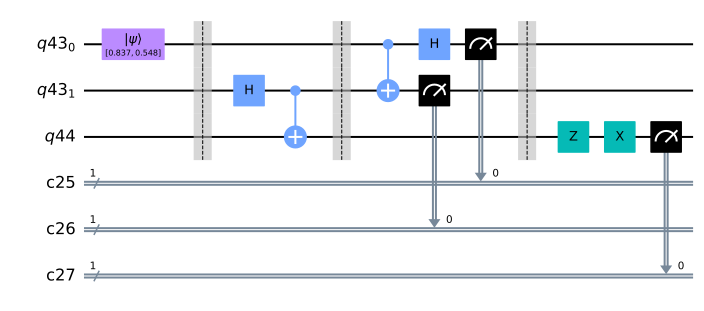

In [57]:
### Look at the complete circuit
mycircuit.draw()

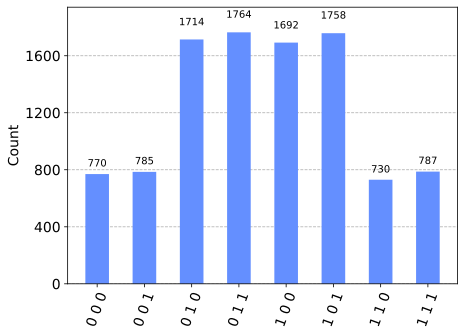

In [60]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)
